In [407]:
import matplotlib
import matplotlib.pyplot as plt
import json
import numpy as np
import math
import pydub
from pydub import AudioSegment
import moviepy.editor as mp
from moviepy.video.io.VideoFileClip import VideoFileClip

In [408]:
def get_score_from_chat(chat, keywords, time_from=0, time_to=0, grouping=10):
    file = open(chat, "r")
    chat_data = file.read()
    file.close()
    json_chat = json.loads(chat_data)
    
    words = get_words_per_seconds(json_chat, time_from, time_to)
    if time_to == 0:
        for k in list(words.keys()):
            if int(k) > time_to:
                time_to = int(k)
    scores = []
    for i in range(time_to - time_from):
        time = i + time_from
        if str(time) in words:
            score = get_score_from_list(words[str(time)], keywords)
            scores.append(score)
        else:
            scores.append(0)
    
    scores_grouped = []
    acc = 0
    for i in range(len(scores)):
        if i % grouping == 0 and i > 0:
            scores_grouped.append(acc)
            acc = 0
        else:
            acc = acc + scores[i]
    if len(scores) % grouping < grouping - 1:
        scores_grouped.append(acc)
    return scores_grouped, len(scores)


def get_words_per_seconds(json_chat, time_from, time_to):
    comments = json_chat['comments']
    words = {}
    for c in comments:
        offset_sec = round(float(c['content_offset_seconds']))
        if offset_sec < time_from:
            continue
        if time_to > 0 and offset_sec > time_to:
            break
        offset_str = str(offset_sec)
        if not offset_sec in words:
            words[offset_str] = []
        message = c['message']['body']
        words[offset_str].append(message)
    return words


def get_score_from_list(words, keywords):
    score = 0
    for wo in words:
        for w in wo.split(" "):
            for k in keywords:
                if k in w.lower():
                    score = score + 1
                else:
                    score = score + 0
    return score

In [409]:
def comments_score(comments, grouping, start_time, end_time):
    scores = {}

    grouping = int(grouping) if grouping else 10
    for comment_info in comments:
        time_since_start = int(math.ceil(comment_info['content_offset_seconds'] / grouping)) * grouping

        if (start_time and end_time) and (time_since_start < int(start_time) or time_since_start > int(end_time)):
            continue

        if time_since_start not in scores:
            scores[time_since_start] = 0 

        comment_score = [keyword_highlightness_score if w in k else default_highlightness_score for w in comment_info['message']['body'].lower().split(' ') for k in keywords]
        scores[time_since_start] += sum(comment_score)

    return scores

In [410]:
def extract_sound(video_name, ext):
    clip = mp.VideoFileClip(video_name + "." + ext)
    clip.audio.write_audiofile(video_name + ".wav")

    
def create_clip(original_video, cut_from, cut_to, clip_name, ext):
    with VideoFileClip(original_video) as video:
        new = video.subclip(cut_from, cut_to)
        new.write_videofile(clip_name + "." + ext, audio_codec='aac')
    
    
def generate_plot(sound_name):
    start_time = 0
    end_time = 10

    song = AudioSegment.from_wav(sound_name)

    original_array = []
    final_array = []

    while end_time <= 45 * 60:
        extract = song[start_time * 1000:end_time * 1000]
        val = extract.rms + 96

        original_array.append(val)

        start_time = start_time + 10
        end_time = end_time + 10

    max_peak_value = max(original_array)

    for val in original_array:
        final_array.append(val * 1 / max_peak_value)
    return final_array

From: 10:10
To: 10:20


chunk:   0%|          | 2/442 [00:00<00:24, 17.68it/s, now=None]

Moviepy - Building video ../res/output/G2-SKT-1.mp4.
MoviePy - Writing audio in G2-SKT-1TEMP_MPY_wvf_snd.mp4



t:   5%|▍         | 23/500 [00:00<00:02, 224.85it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../res/output/G2-SKT-1.mp4




t:   0%|          | 2/500 [00:33<2:20:58, 16.98s/it, now=None]

Moviepy - Done !
Moviepy - video ready ../res/output/G2-SKT-1.mp4
From: 18:20
To: 18:40


chunk:   0%|          | 2/662 [00:00<00:36, 17.87it/s, now=None]

Moviepy - Building video ../res/output/G2-SKT-2.mp4.
MoviePy - Writing audio in G2-SKT-2TEMP_MPY_wvf_snd.mp4



t:   3%|▎         | 21/750 [00:00<00:03, 203.18it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../res/output/G2-SKT-2.mp4




t:   0%|          | 2/500 [00:46<3:13:56, 23.37s/it, now=None]

Moviepy - Done !
Moviepy - video ready ../res/output/G2-SKT-2.mp4
From: 26:50
To: 27:10


chunk:   0%|          | 2/662 [00:00<00:37, 17.49it/s, now=None]

Moviepy - Building video ../res/output/G2-SKT-3.mp4.
MoviePy - Writing audio in G2-SKT-3TEMP_MPY_wvf_snd.mp4



t:   3%|▎         | 26/750 [00:00<00:02, 250.48it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../res/output/G2-SKT-3.mp4




t:   0%|          | 2/500 [01:02<4:20:12, 31.35s/it, now=None]

Moviepy - Done !
Moviepy - video ready ../res/output/G2-SKT-3.mp4
From: 34:40
To: 35:0


chunk:   0%|          | 2/662 [00:00<00:36, 18.07it/s, now=None]

Moviepy - Building video ../res/output/G2-SKT-4.mp4.
MoviePy - Writing audio in G2-SKT-4TEMP_MPY_wvf_snd.mp4



t:   3%|▎         | 24/750 [00:00<00:03, 232.23it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../res/output/G2-SKT-4.mp4




t:   0%|          | 2/500 [01:19<5:29:57, 39.75s/it, now=None]

Moviepy - Done !
Moviepy - video ready ../res/output/G2-SKT-4.mp4
From: 38:30
To: 38:40


chunk:   0%|          | 2/442 [00:00<00:23, 18.53it/s, now=None]

Moviepy - Building video ../res/output/G2-SKT-5.mp4.
MoviePy - Writing audio in G2-SKT-5TEMP_MPY_wvf_snd.mp4



t:   5%|▌         | 25/500 [00:00<00:01, 242.34it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../res/output/G2-SKT-5.mp4




t:   0%|          | 2/500 [01:30<6:16:52, 45.41s/it, now=None]

Moviepy - Done !
Moviepy - video ready ../res/output/G2-SKT-5.mp4
From: 41:40
To: 42:0


chunk:   0%|          | 2/662 [00:00<00:35, 18.53it/s, now=None]

Moviepy - Building video ../res/output/G2-SKT-6.mp4.
MoviePy - Writing audio in G2-SKT-6TEMP_MPY_wvf_snd.mp4



t:   3%|▎         | 25/750 [00:00<00:02, 243.03it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../res/output/G2-SKT-6.mp4




t:   0%|          | 2/500 [01:47<7:24:15, 53.53s/it, now=None]

Moviepy - Done !
Moviepy - video ready ../res/output/G2-SKT-6.mp4
From: 42:30
To: 42:40


chunk:   0%|          | 2/442 [00:00<00:23, 18.48it/s, now=None]

Moviepy - Building video ../res/output/G2-SKT-7.mp4.
MoviePy - Writing audio in G2-SKT-7TEMP_MPY_wvf_snd.mp4



t:   5%|▍         | 24/500 [00:00<00:02, 236.75it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../res/output/G2-SKT-7.mp4




t:   0%|          | 2/500 [01:58<8:10:30, 59.10s/it, now=None]

Moviepy - Done !
Moviepy - video ready ../res/output/G2-SKT-7.mp4
From: 43:30
To: 43:40


chunk:   0%|          | 2/442 [00:00<00:23, 18.66it/s, now=None]

Moviepy - Building video ../res/output/G2-SKT-8.mp4.
MoviePy - Writing audio in G2-SKT-8TEMP_MPY_wvf_snd.mp4



t:   5%|▍         | 24/500 [00:00<00:02, 228.10it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../res/output/G2-SKT-8.mp4




t:   0%|          | 2/500 [02:09<8:55:22, 64.50s/it, now=None]

Moviepy - Done !
Moviepy - video ready ../res/output/G2-SKT-8.mp4


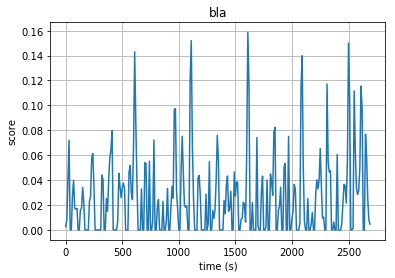

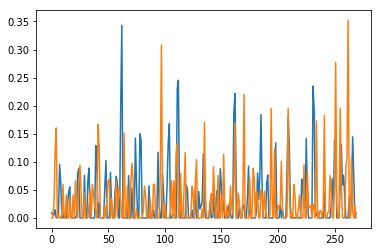

In [412]:
tfrom = 16560
tto = 19260
grouping = 10

movie_name = "G2-SKT"
movie_ext = "mp4"
sound_ext = "wav"
json_ext = "json"

default_highlightness_score = 0
keyword_highlightness_score = 1
keywords = [
    'pog',
    'omg',
    'gg',
    'wtf',
    'dang',
    'clip',
    'holy',
    'nice',
    'kappa',
    'trihard',
    'tryhard',
    '4head',
    'cmonburh',
    'lul',
    'cy@'
]

#extract_sound(movie_name, movie_ext)
sound = np.array(generate_plot('../res/{}.{}'.format(movie_name, sound_ext)))
sound_grad = [grad if grad > 0 else 0 for grad in np.gradient(sound)]

# read file
with open('../res/{}.{}'.format(movie_name, json_ext), 'r') as file:
    data=file.read()
    
chat = json.loads(data)

#score, frames = get_score_from_chat("../res/worlds_chat.json", ['pog', 'gg', 'omg', 'wtf', 'dang', 'clip', 'holy', 'nice'], time_from=tfrom, time_to=tto, grouping=grouping)
scores = comments_score(chat['comments'], grouping, tfrom, tto)
lscore = []
for i in range(tfrom, tto, grouping):
    if i in scores:
        lscore.append(scores[i])
    else:
        lscore.append(0)
lscore = lscore / np.max(lscore)
lscore_grad = [grad if grad > 0 else 0 for grad in np.gradient(lscore)]

combination = np.zeros(min(len(lscore), len(sound)))

for i in range(min(len(lscore), len(sound))):
    combination[i] = (lscore_grad[i] + sound_grad[i]) / 2
    
acc = 0
final = np.zeros(len(combination))
for i in range(len(combination)):
    if combination[i] > 0:
        acc = acc + combination[i]
    else:
        acc = acc / 2
    final[i] = acc
final = [grad if grad > 0 else 0 for grad in np.gradient(final)]
    
in_highlight = False
start = 0
end = 0
clip = 0
for i in range(len(final)):
    sec = i * 10
    if final[i] > 0.10:
        if not in_highlight:
            print('From: {}:{}'.format(math.floor(sec/60), sec%60))
            start = sec
        in_highlight = True
    else:
        if in_highlight:
            print('To: {}:{}'.format(math.floor(sec/60), sec%60))
            end = sec
            clip = clip + 1
            create_clip('../res/{}.{}'.format(movie_name, movie_ext), start, end + grouping, "../res/output/{}-{}".format(movie_name, clip), 'mp4')
        in_highlight = False
        
    
t = np.arange(0, 45*60, 10)

fig, ax = plt.subplots()

ax.plot(t, final)

ax.set(xlabel='time (s)', ylabel='score', title='bla')
ax.grid()

plt.show()

plt.plot(sound_grad)
plt.plot(lscore_grad)
